In [1]:
#Linear Regression-(A dummy ecommerce dataset)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Ecommerce Customers')

In [15]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [17]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [21]:
sns.set_style('whitegrid')

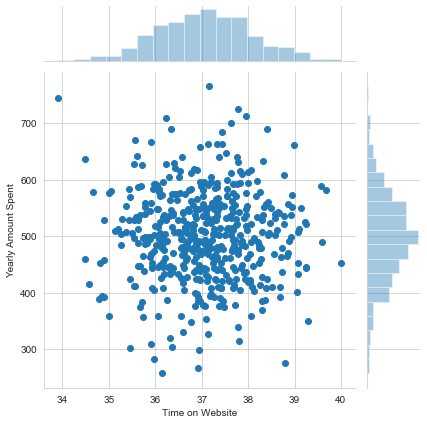

In [23]:
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data= df)

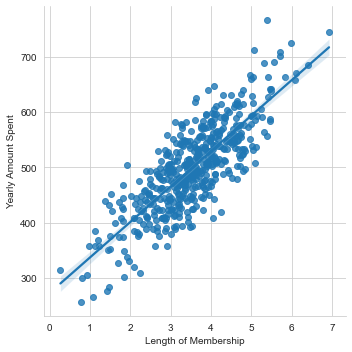

In [26]:
sns.lmplot(y = 'Yearly Amount Spent', x = 'Length of Membership' , data = df)

In [4]:
#Splitting Data

In [5]:
X = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']] #getting all num values except the last i.e the features
y = df['Yearly Amount Spent'] #label i.e the last column



In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 101)

In [7]:
#Training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
#Coefficients of model
model.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [9]:
#Prediction of test data
y_pred = model.predict(X_test)


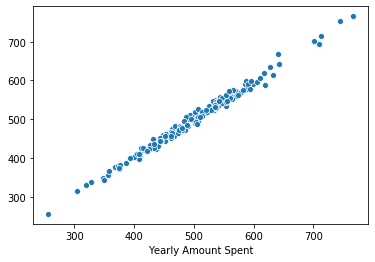

In [10]:
#Scatter plot betn real and predicted y values
sns.scatterplot(x = y_test,y = y_pred,data=df)


In [12]:
#Evaluating the model
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMS:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MAE: 7.228148653430838
MSE: 79.81305165097461
RMS: 8.933815066978642


In [13]:
#R-squared value
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9890046246741234


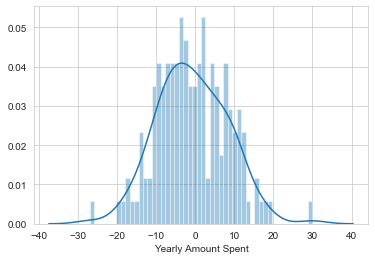

In [29]:
#Distplot - A normal dist is termed as good fitting model
sns.distplot(y_test-y_pred,bins = 50)

In [34]:
X.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [32]:
model.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [38]:
#Conclusion
coeffecients = pd.DataFrame(data=  model.coef_, index = X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients


,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [39]:
#1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
#Similarly for other columns

In [ ]:
#Therefore company should focus on mobile app as it has high value
#But having said that, company can also work on websitw to increase its per unit value....